In [1]:
import os.path
import numpy as np
import h5py
#import tensorboard as tensorboard
#from tensorboard.plugins import projector
import tensorflow as tf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as tk
import tensorflow.keras.layers as tkl
from sklearn.model_selection import train_test_split

In [2]:
root =r"C:\Users\nampo\Downloads"

in_file = h5py.File(os.path.join(root,"ascad-variable.h5"), "r")
print(in_file.keys())
#print(in_file['Attack_traces'].keys())

X_profiling = np.array(in_file['Profiling_traces/traces'], dtype=np.float64)
# Load profiling labels
Y_profiling = np.array(in_file['Profiling_traces/labels'], dtype = np.uint8)

# Load attacking traces
X_attack = np.array(in_file['Attack_traces/traces'], dtype=np.float64)
# Load attacking labels
Y_attack = np.array(in_file['Attack_traces/labels'], dtype = np.uint8)

<KeysViewHDF5 ['Attack_traces', 'Profiling_traces']>


In [3]:
print(X_profiling.shape)
print(X_attack)
print(Y_profiling.shape)
print(Y_attack)
print(min(Y_profiling), max(Y_profiling))
print(np.min(X_profiling), np.max(X_profiling))

(200000, 1400)
[[-20. -22. -27. ... -86. -85. -86.]
 [-20. -24. -28. ... -85. -85. -84.]
 [-19. -25. -29. ... -85. -86. -85.]
 ...
 [-21. -23. -28. ... -85. -87. -85.]
 [-21. -24. -29. ... -86. -84. -85.]
 [-21. -21. -26. ... -85. -85. -85.]]
(200000,)
[145 220   4 ...  49 208 251]
0 255
-116.0 100.0


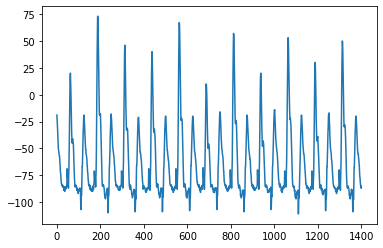

In [4]:
plt.plot(X_profiling[0,:])

In [5]:
feature_profiling = pd.DataFrame(X_profiling)
label_profiling = pd.DataFrame(Y_profiling)

dataset_profiling = pd.concat([feature_profiling, label_profiling], axis = 1, ignore_index=True)
dataset_profiling.head()

,0,1,2,3,4,5,6,7,8,9,...,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
0,-19.0,-23.0,-27.0,-32.0,-38.0,-41.0,-47.0,-51.0,-52.0,-54.0,...,-72.0,-76.0,-77.0,-81.0,-83.0,-85.0,-86.0,-85.0,-87.0,125
1,-19.0,-25.0,-30.0,-35.0,-41.0,-45.0,-48.0,-50.0,-53.0,-53.0,...,-74.0,-77.0,-80.0,-84.0,-84.0,-85.0,-85.0,-85.0,-86.0,74
2,-20.0,-26.0,-28.0,-32.0,-40.0,-43.0,-48.0,-51.0,-53.0,-56.0,...,-72.0,-75.0,-78.0,-82.0,-83.0,-84.0,-85.0,-86.0,-86.0,99
3,-20.0,-25.0,-27.0,-34.0,-40.0,-44.0,-47.0,-50.0,-52.0,-54.0,...,-73.0,-76.0,-80.0,-83.0,-84.0,-85.0,-84.0,-84.0,-84.0,114
4,-22.0,-25.0,-27.0,-33.0,-39.0,-44.0,-48.0,-51.0,-52.0,-54.0,...,-72.0,-75.0,-78.0,-82.0,-84.0,-84.0,-85.0,-84.0,-84.0,39


In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X_profiling, Y_profiling, test_size=0.33,shuffle=True, random_state=42)

In [7]:
#X_train = X_train[:50000,:]
#y_train = y_train[:50000]

#X_test = X_test[:10000,:]
#y_test = y_test[:10000]

#nb_classes = 256
#initializer = tk.initializers.GlorotUniform()
#y_train = tf.one_hot(y_train,depth = 256)
#X_train = X_train[:,:,np.newaxis]
#X_test = X_test[:,:,np.newaxis]
#print(X_train.shape)
#y_test = tf.one_hot(y_test,depth = 256)

(50000, 1400, 1)


In [9]:
#print(X_train.shape)
#input_shape = (None,1400,1)
#model = tk.models.Sequential()
#model.add(tkl.LSTM(1024,kernel_initializer=initializer))
#model.add(tkl.Dense(512, activation=tk.layers.LeakyReLU(alpha=0.3),kernel_initializer=initializer))
#model.add(tkl.Dense(nb_classes, activation='softmax',kernel_initializer=initializer))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.build(input_shape)
#print(model.summary())
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=1024)

(50000, 1400, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024)              4202496   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
Total params: 4,858,624
Trainable params: 4,858,624
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/400
29/49 [================>.............] - ETA: 3:28:37 - loss: 5.5765 - accuracy: 0.0043

KeyboardInterrupt: 

In [ ]:
#summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [6]:
def generate_triplet(list_X, list_y,X,y):
    triplets = np.empty((1,4200))
    labels = []
    for i in range(X.shape[0]):
        index_pos = np.random.choice(np.where(list_y == y[i])[0])
        index_neg = np.random.choice(np.where(list_y != y[i])[0])
        result = np.concatenate((X[i,:],list_X[index_pos,:]), axis = -1)
        result = np.concatenate((result, list_X[index_neg,:]), axis = -1)
        triplets = np.concatenate((triplets, result[np.newaxis,:]), axis = 0)
        assert y[i] == list_y[index_pos] and y[i] != list_y[index_neg]
        labels.append(np.array([y[i], list_y[index_pos], list_y[index_neg]]))
    return triplets, labels

In [7]:
#triplets, labels = generate_triplet(X_profiling, Y_profiling)

In [8]:
#print(len(triplets))
#print(len(labels))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_profiling, Y_profiling, test_size=0.3, random_state=42, shuffle=True)
print(len(X_train))
print(len(y_train))

batch_size = 1024

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

140000
140000


In [10]:
print(len(X_train[0]))

1400


In [11]:
def Triplet(input_shape, embedding_size):
    model = tk.Sequential()
    model.add(tkl.Conv1D(input_shape=input_shape,filters=64,kernel_size=15,padding="same", activation="selu"))
    model.add(tkl.AveragePooling1D(pool_size=15,strides=15))
    model.add(tkl.Conv1D(filters=128, kernel_size=3, padding="same", activation="selu"))
    model.add(tkl.AveragePooling1D(pool_size=2,strides=2))
    model.add(tkl.Flatten(name='Flatten'))
    model.add(tkl.Dense(embedding_size*16))
    model.add(tkl.Dense(embedding_size))
    return model

model = Triplet(input_shape = (1400,1), embedding_size = 32)
optimizer = tk.optimizers.Adam(learning_rate = 0.0001, weight_decay = 0.0001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1400, 64)          1024      
                                                                 
 average_pooling1d (AverageP  (None, 93, 64)           0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 93, 128)           24704     
                                                                 
 average_pooling1d_1 (Averag  (None, 46, 128)          0         
 ePooling1D)                                                     
                                                                 
 Flatten (Flatten)           (None, 5888)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [13]:
def loss(feature, labels, num_classes, alpha_value):
    feature_distance = (tf.math.add(
            tf.math.reduce_sum(tf.math.square(feature), axis=[1], keepdims=True),
            tf.math.reduce_sum(tf.math.square(tf.transpose(feature)), axis=[0], keepdims=True),
        )
        - 2.0 * tf.matmul(feature, tf.transpose(feature))
    )
    label_distance = (
        tf.math.add(
            tf.math.square(labels), 
            tf.math.square(tf.transpose(labels))
        )
        - 2.0 * tf.matmul(labels, tf.transpose(labels)))
    
    result = feature_distance / tf.pow(alpha_value, tf.math.sqrt(label_distance)/num_classes)
    result = tf.math.maximum(result, 0.0)    
    return result

In [14]:
def train(model,X_profiling, Y_profiling, train_dataset, val_dataset, optimizer, epochs = 5):
    list_train_loss = []
    list_val_loss = []
    num_classes = 256
    alpha_value = 0.2
    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))

        # Iterate over the batches of the dataset.
        for step,(x_batch,labels) in enumerate(train_dataset):
            triplets, triple_labels = generate_triplet(X_profiling, Y_profiling, x_batch,labels)
            triplets = triplets[:,:,np.newaxis]
            with tf.GradientTape() as tape:
                anchor = model(triplets[:,:1400,:], training=True)
                pos = model(triplets[:,1400:2800,:], training=True)
                neg = model(triplets[:,2800:,:], training=True)
                print(neg)
                triplet_loss = loss(triplets[:,:1400,:] - triplets[:,1400:2800,:],anchor - pos, num_classes, alpha_value) 
                - loss(triplets[:,:1400,:] - triplets[:,2800:,:],anchor - neg, num_classes, alpha_value)
            
            print("loss",loss_value)
            list_train_loss.append(loss_value)
            grads = tape.gradient(loss_value, model.trainable_weights)

            optimizer.apply_gradients(zip(grads, model.trainable_weights))


        # Run a validation loop at the end of each epoch.
        #for x_batch_val, y_batch_val in val_dataset:
            #a = 0
    return list_train_loss, list_val_loss

In [ ]:
list_train_loss, list_val_loss = train(model,X_profiling, Y_profiling, train_dataset, val_dataset, optimizer, epochs = 5)


Start of epoch 0
tf.Tensor(
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.2301699  -9.826677   -2.507187   ...  6.4817066  15.379827
   1.1630467 ]
 [ 1.7089455  -9.976214   -2.484106   ...  6.4701157  15.394144
   0.8530235 ]
 ...
 [ 1.9046581  -9.807146   -2.4972074  ...  6.349346   15.449163
   0.64412284]
 [ 1.5059823  -9.950378   -2.6580975  ...  6.625245   15.468502
   0.7067424 ]
 [ 1.6940302  -9.849323   -2.5379326  ...  6.4328113  15.450087
   0.7986027 ]], shape=(1025, 32), dtype=float32)
